In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df = df.drop("Id", axis=1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,10

In [4]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

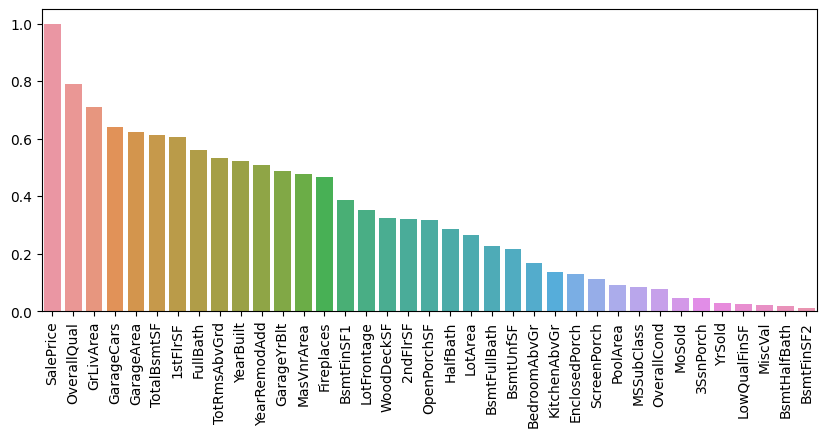

In [7]:
corr = abs(df.corr()["SalePrice"]).sort_values(ascending= False)
large_corr = corr[corr > 0.3]

plt.figure(figsize = (10, 4), dpi=100)
sns.barplot(x = corr.index, y = corr.values)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

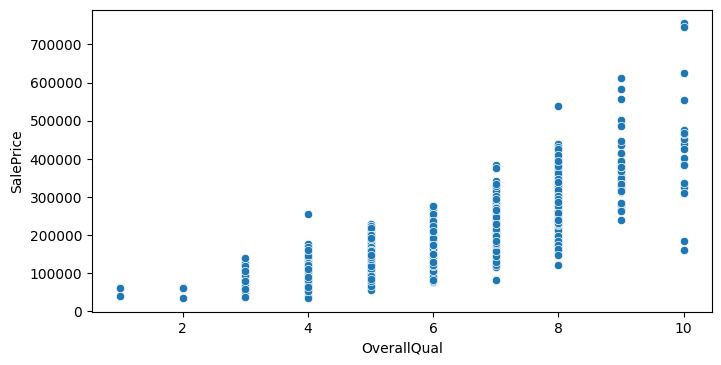

In [8]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.scatterplot(data = df, x = "OverallQual", y = "SalePrice" )

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

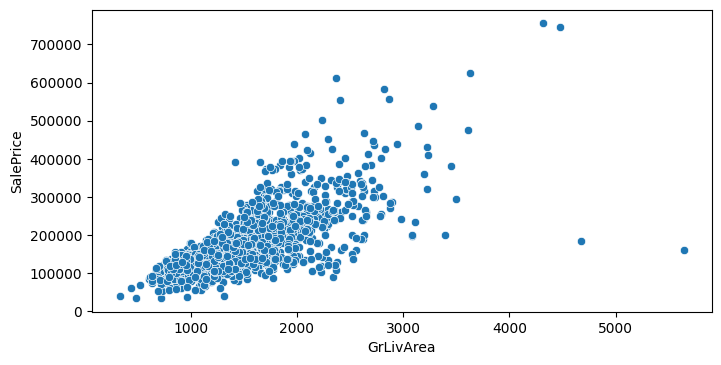

In [9]:
plt.figure(figsize=(8, 4), dpi = 100)
sns.scatterplot(data = df, x="GrLivArea" , y="SalePrice")

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

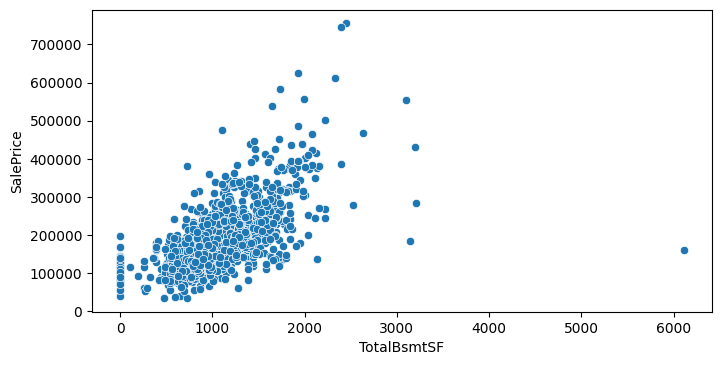

In [10]:
plt.figure(figsize=(8, 4), dpi=100)
sns.scatterplot(data = df, x="TotalBsmtSF", y="SalePrice")

In [11]:
df[(df['SalePrice'] < 200000) & (df['OverallQual'] > 8)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [12]:
df[(df['SalePrice'] < 200000) & (df['OverallQual'] > 8) & (df['GrLivArea'] > 4000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [13]:
df = df[df.LotArea < 150000]
df = df[df.GrLivArea < 4000]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1453 non-null   int64  
 1   MSZoning       1453 non-null   object 
 2   LotFrontage    1196 non-null   float64
 3   LotArea        1453 non-null   int64  
 4   Street         1453 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1453 non-null   object 
 7   LandContour    1453 non-null   object 
 8   Utilities      1453 non-null   object 
 9   LotConfig      1453 non-null   object 
 10  LandSlope      1453 non-null   object 
 11  Neighborhood   1453 non-null   object 
 12  Condition1     1453 non-null   object 
 13  Condition2     1453 non-null   object 
 14  BldgType       1453 non-null   object 
 15  HouseStyle     1453 non-null   object 
 16  OverallQual    1453 non-null   int64  
 17  OverallCond    1453 non-null   int64  
 18  YearBuil

In [15]:
# function to calculate missing values
def percent_missing(df):
    missing_count = df.isna().sum().sort_values(ascending = False)
    missing_percent = missing_percent = 100 * df.isna().sum().sort_values(ascending = False) / len(df)
    missing_count = pd.DataFrame(missing_count[missing_count > 0])
    missing_percent = pd.DataFrame(missing_percent[missing_percent > 0])
    missing_table = pd.concat([missing_count, missing_percent], axis = 1)
    missing_table.columns = ["missing_count", "missing_percent"]
    
    return missing_table

In [16]:
percent_nan = percent_missing(df)
percent_nan

,missing_count,missing_percent
PoolQC,1448,99.655884
MiscFeature,1401,96.421198
Alley,1362,93.737096
Fence,1173,80.729525
FireplaceQu,690,47.487956
LotFrontage,257,17.687543
GarageYrBlt,81,5.574673
GarageCond,81,5.574673
GarageType,81,5.574673
GarageFinish,81,5.574673


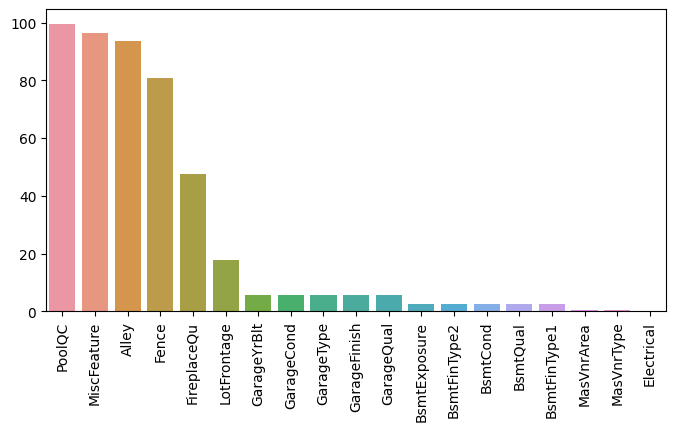

In [17]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.barplot(x = percent_nan.index, y = percent_nan.values[:, 1])
plt.xticks(rotation = 90)
plt.show()

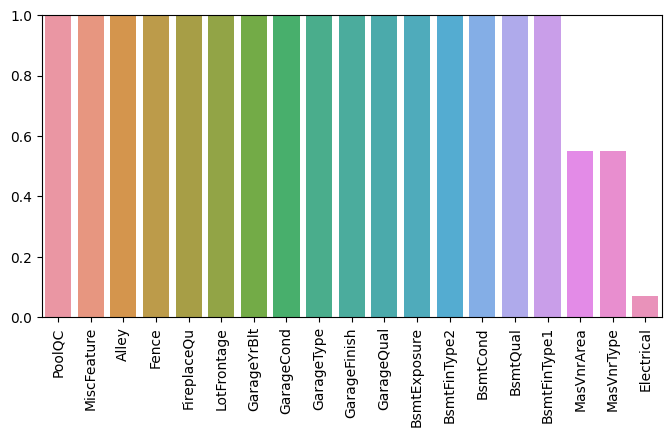

In [18]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.barplot(x = percent_nan.index, y = percent_nan.values[:, 1])
plt.xticks(rotation = 90)
plt.ylim(0, 1)
plt.show()

In [19]:
percent_nan[percent_nan["missing_percent"] < 1]

,missing_count,missing_percent
MasVnrArea,8,0.550585
MasVnrType,8,0.550585
Electrical,1,0.068823


In [20]:
index = percent_nan[percent_nan["missing_percent"] < 1].index
for i in index:
    print(df[df["Electrical"].isnull()][i])

1379    0.0
Name: MasVnrArea, dtype: float64
1379    None
Name: MasVnrType, dtype: object
1379    NaN
Name: Electrical, dtype: object


In [21]:
percent_nan = percent_missing(df)
percent_nan

,missing_count,missing_percent
PoolQC,1448,99.655884
MiscFeature,1401,96.421198
Alley,1362,93.737096
Fence,1173,80.729525
FireplaceQu,690,47.487956
LotFrontage,257,17.687543
GarageYrBlt,81,5.574673
GarageCond,81,5.574673
GarageType,81,5.574673
GarageFinish,81,5.574673


In [22]:
for col in df.columns:
    if "Bsmt" in col:
        print(col)

BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath


In [23]:
# numeric columns
base_num_col = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
df[base_num_col] = df[base_num_col].fillna(0)

# categorical columns
base_cat_col = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df[base_cat_col] = df[base_cat_col].fillna('None')

null_values =df.loc[:, df.isnull().sum()>500]
df.drop(null_values, axis=1, inplace = True)

# list of less important features
less_important = ['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch',
 '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
 'LotConfig', 'LandSlope', 'Condition2', 'BldgType', 'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtExposure','BsmtFinType1',
 'Heating', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish','SaleType']

df.drop(less_important, axis = 1, inplace = True)

In [24]:
percent_nan = percent_missing(df)
percent_nan

,missing_count,missing_percent
LotFrontage,257,17.687543
GarageCond,81,5.574673
GarageQual,81,5.574673
GarageYrBlt,81,5.574673
MasVnrArea,8,0.550585
Electrical,1,0.068823


In [25]:
df[df["Electrical"].isnull()]

,LotFrontage,LotArea,Neighborhood,Condition1,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterCond,Foundation,BsmtCond,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,SaleCondition,SalePrice
1379,73.0,9735,Timber,Norm,SLvl,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,0.0,TA,PConc,TA,0,Unf,384,384,Y,NaN,754,640,1394,0,2,1,3,7,Typ,0,2007.0,2,400,TA,TA,Y,100,0,0,Normal,167500


In [26]:
df['MasVnrArea'].fillna(0 , inplace = True)
df['BsmtCond'].fillna('NA' , inplace = True)
df['BsmtFinType2'].fillna('NA' , inplace = True)
df['Electrical'].fillna('SBrkr' , inplace = True)
df['GarageYrBlt'].fillna(0 , inplace = True)
df['GarageQual'].fillna('NA' , inplace = True)
df['GarageCond'].fillna('NA' , inplace = True)

In [27]:
percent_nan = percent_missing(df)
percent_nan

,missing_count,missing_percent
LotFrontage,257,17.687543


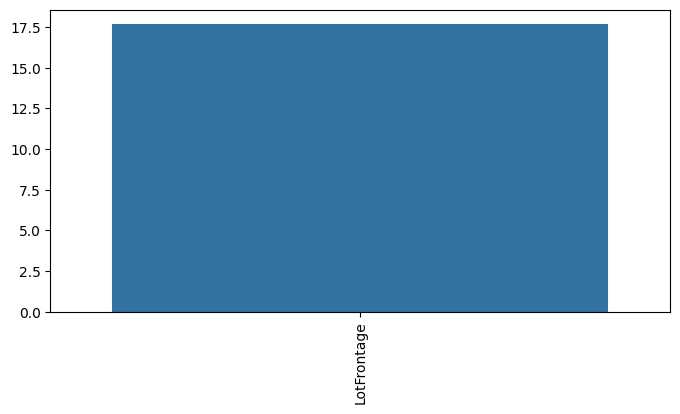

In [28]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.barplot(x = percent_nan.index, y = percent_nan.values[:, 1])
plt.xticks(rotation = 90)
plt.show()

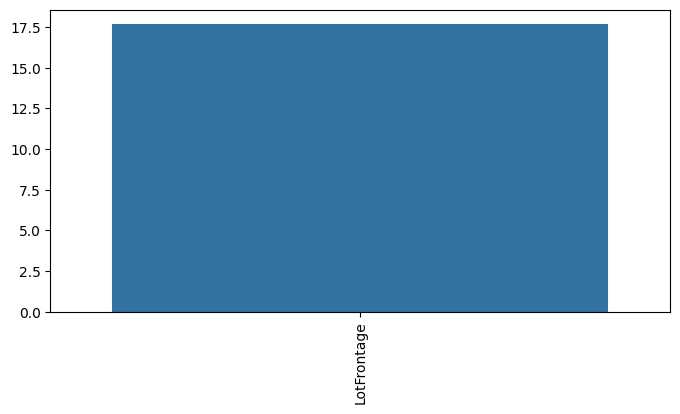

In [29]:
percent_nan = percent_missing(df)

plt.figure(figsize = (8, 4), dpi = 100)
sns.barplot(x = percent_nan.index, y = percent_nan.values[:, 1])
plt.xticks(rotation = 90)
plt.show()

In [30]:
df["LotFrontage"].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
64.0      19
68.0      19
24.0      19
73.0      18
72.0      17
63.0      17
55.0      17
79.0      17
100.0     16
66.0      15
51.0      15
74.0      15
52.0      14
59.0      13
57.0      12
40.0      12
43.0      12
71.0      12
67.0      12
82.0      12
76.0      11
69.0      11
88.0      10
86.0      10
92.0      10
53.0      10
34.0      10
84.0       9
35.0       9
77.0       9
44.0       9
62.0       9
98.0       8
61.0       8
96.0       8
93.0       8
95.0       7
58.0       7
107.0      7
120.0      7
105.0      6
36.0       6
94.0       6
30.0       6
89.0       6
41.0       6
110.0      6
81.0       6
91.0       6
54.0       6
48.0       6
37.0       5
83.0       5
47.0       5
32.0       5
56.0       5
87.0       5
42.0       4
102.0      4
49.0       4
99.0       3
103.0      3
45.0       3
108.0      3
109.0      2
97.0       2
122.0      2

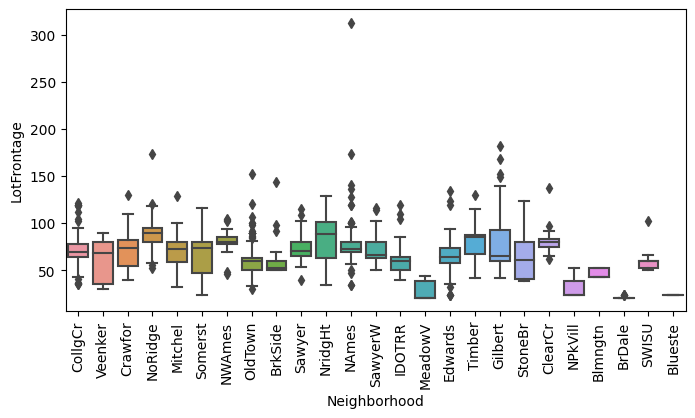

In [31]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.boxplot(x = df["Neighborhood"], y = df["LotFrontage"])
plt.xticks(rotation = 90)
plt.show()

In [32]:
df.groupby("Neighborhood")["LotFrontage"].mean()

Neighborhood
Blmngtn    47.142857
Blueste    24.000000
BrDale     21.562500
BrkSide    57.509804
ClearCr    83.461538
CollgCr    71.682540
Crawfor    71.804878
Edwards    64.811111
Gilbert    79.877551
IDOTRR     62.500000
MeadowV    27.800000
Mitchel    70.083333
NAmes      76.462366
NPkVill    32.285714
NWAmes     81.288889
NoRidge    89.290323
NridgHt    81.881579
OldTown    62.788991
SWISU      58.913043
Sawyer     74.437500
SawyerW    71.500000
Somerst    64.666667
StoneBr    62.700000
Timber     77.724138
Veenker    59.714286
Name: LotFrontage, dtype: float64

In [33]:
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda value: value.fillna(value.mean()))

In [34]:
percent_nan = percent_missing(df)
percent_nan

,missing_count,missing_percent


In [35]:
df['LotFrontage'] = np.cbrt(df['LotFrontage'])
df['GrLivArea']=np.log(df['GrLivArea'])
df['LotArea']=np.log(df['LotArea'])

In [36]:
df.select_dtypes(include = 'object')

,Neighborhood,Condition1,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterCond,Foundation,BsmtCond,BsmtFinType2,CentralAir,Electrical,Functional,GarageQual,GarageCond,PavedDrive,SaleCondition
0,CollgCr,Norm,2Story,Gable,CompShg,VinylSd,VinylSd,TA,PConc,TA,Unf,Y,SBrkr,Typ,TA,TA,Y,Normal
1,Veenker,Feedr,1Story,Gable,CompShg,MetalSd,MetalSd,TA,CBlock,TA,Unf,Y,SBrkr,Typ,TA,TA,Y,Normal
2,CollgCr,Norm,2Story,Gable,CompShg,VinylSd,VinylSd,TA,PConc,TA,Unf,Y,SBrkr,Typ,TA,TA,Y,Normal
3,Crawfor,Norm,2Story,Gable,CompShg,Wd Sdng,Wd Shng,TA,BrkTil,Gd,Unf,Y,SBrkr,Typ,TA,TA,Y,Abnorml
4,NoRidge,Norm,2Story,Gable,CompShg,VinylSd,VinylSd,TA,PConc,TA,Unf,Y,SBrkr,Typ,TA,TA,Y,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Gilbert,Norm,2Story,Gable,CompShg,VinylSd,VinylSd,TA,PConc,TA,Unf,Y,SBrkr,Typ,TA,TA,Y,Normal
1456,NWAmes,Norm,1Story,Gable,CompShg,Plywood,Plywood,TA,CBlock,TA,Rec,Y,SBrkr,Min1,TA,TA,Y,Normal
1457,Crawfor,Norm,2Story,Gable,CompShg,CemntBd,CmentBd,Gd,Stone,Gd,Unf,Y,SBrkr,Typ,TA,TA,Y,Normal
1458,NAmes,Norm,1Story,Hip,CompShg,MetalSd,MetalSd,TA,CBlock,TA,Rec,Y,FuseA,Typ,TA,TA,Y,Normal


In [37]:
df_object = df.select_dtypes(include = 'object')
df_numeric = df.select_dtypes(exclude = 'object')

In [38]:
from sklearn.preprocessing import LabelEncoder
df_object = df_object.apply(LabelEncoder().fit_transform)
df_final = pd.concat([df_numeric, df_object], axis = 1)

In [39]:
x = df_final.drop("SalePrice", axis = 1)
y = df_final["SalePrice"]

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.30)
# x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train, y_train, random_state = 0, test_size = 0.3)

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
# x_train2 = sc.fit_transform(x_train2)
# x_test2 = sc.transform(x_test2)
x_test = sc.transform(x_test)

In [42]:
# Lasso regression
from sklearn.linear_model import LassoCV

model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(x_train, y_train)
lasso_preds = model_lasso.predict(x_test)

from sklearn.metrics import mean_squared_error
rmse_lass = np.sqrt(mean_squared_error(np.log(y_test), np.log(lasso_preds)))
print(rmse_lass)

0.17873331865524442


In [43]:
# XGB
from xgboost import XGBRegressor
xgb_r = XGBRegressor(objective ='reg:squarederror',
                     learning_rate = 0.01, # learning rate, 0.01-3 or 0.05-3, optimally 0.1 is used
                     colsample_bytree=0.8, # frac of cols to be random samples, 0.5-1
                     scale_pos_weight = 1,
                     gamma=0, # 0.1-0.2
                     max_depth=6, # depth of trees, 3-10
                     min_child_weight=2, # 1-6
                     n_estimators=1000,
                     reg_alpha=0.005, # 0-0.5
                     reg_lambda=0.45,
                     subsample=0.2, # frac of observations as random samples, 0.5-1
                     seed=42)
xgb_r.fit(x_train, y_train)
# xgb_r.fit(x_train2, y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0.005, reg_lambda=0.45, scale_pos_weight=1, seed=42,
             subsample=0.2, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [44]:
# from sklearn.metrics import mean_squared_error
# y_pred2 = xgb_r.predict(x_test2)
# rmse2 = np.sqrt(mean_squared_error(np.log(y_test2), np.log(y_pred2)))
# print(rmse2)

In [45]:
from sklearn.metrics import mean_squared_error
y_pred = xgb_r.predict(x_test)
rmse = np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred)))
print(rmse)

0.11947187115782651


In [46]:
# test data

In [47]:
test_df = pd.read_csv('test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [48]:
# function to calculate missing values
def percent_missing2(df):
    missing_count = df.isna().sum().sort_values(ascending = False)
    missing_percent = missing_percent = 100 * df.isna().sum().sort_values(ascending = False) / len(df)
    missing_count = pd.DataFrame(missing_count[missing_count > 0])
    missing_percent = pd.DataFrame(missing_percent[missing_percent > 0])
    missing_table = pd.concat([missing_count, missing_percent], axis = 1)
    missing_table.columns = ["missing_count", "missing_percent"]
    
    return missing_table

percent_miss_nan = percent_missing2(test_df)
percent_miss_nan

,missing_count,missing_percent
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageYrBlt,78,5.346127
GarageQual,78,5.346127
GarageFinish,78,5.346127
GarageCond,78,5.346127


In [49]:
# basement string features
bsmt_str_cols =  ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
test_df[bsmt_str_cols] = test_df[bsmt_str_cols].fillna('None')

# numeric columns
base_num_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
test_df[base_num_cols] = test_df[base_num_cols].fillna(0)

# test_df = test_df.drop(["PoolQC", "MiscFeature", "Alley", "Fence"], axis = 1)
# test_df["FireplaceQu"] = test_df["FireplaceQu"].fillna("None")
# test_df = test_df.dropna(axis = 0, subset = ["GarageFinish"])
# test_df["MSSubClass"] = test_df["MSSubClass"].apply(str)
# test_df["MSSubClass"].dtypes

test_null_values = test_df.loc[:, test_df.isnull().sum()>500]
test_df.drop(test_null_values, axis=1, inplace = True)

# list of less important features
test_less_important = ['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch',
 '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
 'LotConfig', 'LandSlope', 'Condition2', 'BldgType', 'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtExposure','BsmtFinType1',
 'Heating', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish','SaleType']
test_df.drop(test_less_important, axis = 1, inplace = True)

test_df["LotFrontage"] = test_df.groupby("Neighborhood")["LotFrontage"].transform(lambda value: value.fillna(value.mean()))


# taking care of null values
test_df['MasVnrArea'].fillna(0 , inplace = True)
test_df['BsmtCond'].fillna('NA' , inplace = True)
test_df['BsmtFinType2'].fillna('NA' , inplace = True)
test_df['Electrical'].fillna('SBrkr' , inplace = True)
test_df['GarageYrBlt'].fillna(0 , inplace = True)
test_df['GarageQual'].fillna('NA' , inplace = True)
test_df['GarageCond'].fillna('NA' , inplace = True)
test_df['Exterior1st'].fillna('VinylSd' , inplace = True)
test_df['Exterior2nd'].fillna('VinylSd' , inplace = True)
test_df['BsmtFinSF1'].fillna(0 , inplace = True)
test_df['BsmtUnfSF'].fillna(0 , inplace = True)
test_df['TotalBsmtSF'].fillna(0 , inplace = True)
test_df['BsmtFullBath'].fillna(0 , inplace = True)
test_df['Functional'].fillna('Typ' , inplace = True)
test_df['GarageCars'].fillna(0 , inplace = True)
test_df['GarageArea'].fillna(0, inplace = True)

In [50]:
percent_miss_nan = percent_missing2(test_df)
percent_miss_nan

,missing_count,missing_percent


In [51]:
test_df['LotFrontage'] = np.cbrt(test_df['LotFrontage'])
test_df['GrLivArea']=np.log(test_df['GrLivArea'])
test_df['LotArea']=np.log(test_df['LotArea'])

In [52]:
test_df_object = test_df.select_dtypes(include = "object")
test_df_numeric = test_df.select_dtypes(exclude = "object")

In [53]:
from sklearn.preprocessing import LabelEncoder
test_df_object = test_df_object.apply(LabelEncoder().fit_transform)
test_df_final = pd.concat([test_df_numeric, test_df_object], axis = 1)

In [54]:
test_df_final = test_df_final.drop(["Id"], axis = 1)
test_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1459 non-null   float64
 1   LotArea        1459 non-null   float64
 2   OverallQual    1459 non-null   int64  
 3   YearBuilt      1459 non-null   int64  
 4   YearRemodAdd   1459 non-null   int64  
 5   MasVnrArea     1459 non-null   float64
 6   BsmtFinSF1     1459 non-null   float64
 7   BsmtUnfSF      1459 non-null   float64
 8   TotalBsmtSF    1459 non-null   float64
 9   1stFlrSF       1459 non-null   int64  
 10  2ndFlrSF       1459 non-null   int64  
 11  GrLivArea      1459 non-null   float64
 12  BsmtFullBath   1459 non-null   float64
 13  FullBath       1459 non-null   int64  
 14  HalfBath       1459 non-null   int64  
 15  BedroomAbvGr   1459 non-null   int64  
 16  TotRmsAbvGrd   1459 non-null   int64  
 17  Fireplaces     1459 non-null   int64  
 18  GarageYr

In [55]:
submission = pd.DataFrame()
submission['Id'] = test_df.Id
xgb_prediction = xgb_r.predict(sc.transform(test_df_final))
lasso_prediction = model_lasso.predict(sc.transform(test_df_final))
final_prediction = 0.7*lasso_prediction + 0.3*xgb_prediction

In [56]:
submission['SalePrice'] = final_prediction
submission.to_csv('submission1.csv', index=False)